# Name: TAPOMAYEE BASU

## Task: Prediction using Supervised Machine Learning

## Query: Predict whether a patient has benign or malignant breast cancer using the given Breast Cancer dataset. 

Here we will see how we can fit **Logistic Regression** model to the given dataset to find the answer of the query.

## 1. Data transformation

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score

In [2]:
#loading the dataset

dataset = pd.read_csv('C:\\Users\\Tapomayee Basu\\Downloads\\breast_cancer.csv')

In [3]:
#checking the data structure

print(dataset.shape)

(683, 11)


In [4]:
print(dataset.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1       

Here Class has two values 2 and 4. 2 means the cancer is benign and 4 means the cancer is malignant. 
i.e. **2 = benign, 4 = malignant**

In [5]:
print(dataset.describe())

       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000               683.000000   
mean         1.076720e+06         4.442167                 3.150805   
std          6.206440e+05         2.820761                 3.065145   
min          6.337500e+04         1.000000                 1.000000   
25%          8.776170e+05         2.000000                 1.000000   
50%          1.171795e+06         4.000000                 1.000000   
75%          1.238705e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                683.000000         683.000000   
mean                   3.215227           2.830161   
std                    2.988581           2.864562   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB
None


In [7]:
#checking if there is any missing value in the data

print(dataset.isnull().sum())

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


Well there is no missing value in the given dataset. Hence data cleaning is not required.

## 2. Data visualization

First we plot a bar chart on the basis of class to visualize how many patients have benign or malignant cancer.

Text(0.5, 1.0, 'Bar chart for Breast Cancer data')

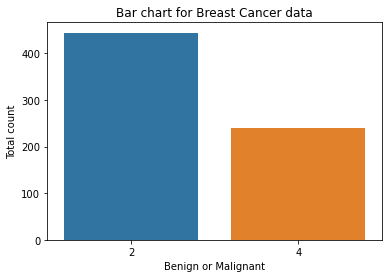

In [8]:
#plotting bar chart on the basis of class(benign/malignant)

sns.countplot(x = 'Class', data = dataset)
plt.xlabel('Benign or Malignant')
plt.ylabel('Total count')
plt.title('Bar chart for Breast Cancer data')

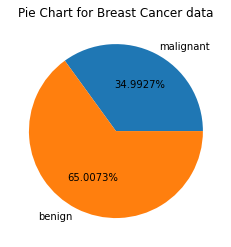

In [9]:
#piechart for the same

zeroes=dataset.Class[dataset.Class==2].count()
ones=dataset.Class[dataset.Class==4].count()
data={'class':['malignant','benign'],'values':[ones,zeroes]}
plt.pie(x='values',labels='class',data=data, autopct='%1.4f%%')
plt.title('Pie Chart for Breast Cancer data')
plt.show()

From both the charts we can clearly see that nearly 65% people tend to have benign cancer whereas rest 35% tend to have malignant cancer. Here the column Class has two class namely benign and malignant. Hence it is a classification problem and we can fit a **Logistic Regression** model to the dataset.

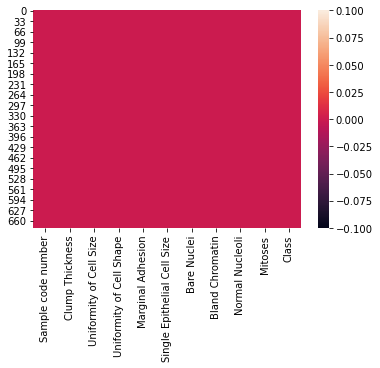

In [10]:
#plotting to check for null values

sns.heatmap(dataset.isna())

We can clearly see no missing values present in the dataset.

## 3. Creating our logistic regression model

We drop the sample code number column as it has no impact in making prediction.

In [11]:
#dropping the column

dataset.drop(['Sample code number'], axis = 1, inplace = True)

In [12]:
print(dataset.head())

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2 

Dividing the dataset on the basis of independent and dependent variable. Here X denotes the matrix of independent variables and y denotes the dependent variable. i.e. X is the input and y is the output.

In [13]:
#dividing the data into dependent and independent variable

X = dataset.iloc[:,:-1].values  
y = dataset.iloc[:,-1].values

Next we will split the data in training and testing set. We will use the training set to build the logistic regression model and the testing set to make prediction using the model.

In [14]:
#splitting the dataset in 80-20 ratio

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

Now we have 80% of the dataset in training set and the rest is in testing set.

In [15]:
#training the logistic regression model on the training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

## 4. Prediction using our model

In [16]:
#predicting test result

y_pred = classifier.predict(X_test)

In [17]:
#creating dataframe for comparing actual and predicted value

df = pd.DataFrame({"Actual":y_test,"Predicted": y_pred})
df

,Actual,Predicted
0,2,2
1,2,2
2,4,4
3,4,4
4,2,2
...,...,...
132,4,4
133,2,2
134,2,2
135,4,4


In [18]:
#finding the model accuracy

accuracy = (accuracy_score(y_test,y_pred)*100)
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 95.62%


## 5. Making prediction about our query

In [19]:
#prediction of query

print(classifier.predict([[8,7,4,4,5,3,5,10,1]]))

[4]


## 6. Checking model accuracy with confusion matrix and getting classification report

In [20]:
#printng the confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ['2','4'], index = ['2','4'])

,2,4
2,84,3
4,3,47


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



## 7. Computing accuracy with k-fold cross validation

In [22]:
#computing the accuracy with k fold cross validation

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("StandardDeviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 96.70%
StandardDeviation: 1.97%


Here we perform a 10-fold cross validation which performs the fitting procedure a total of 10 times and hence we get an extremely good model accuracy of 96.70%. The model standard deviation is pretty low (1.97%). So we can say our model gives result with great accuracy.

**Comment: If a patient has the levels of Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses are 8,7,4,4,5,3,5,10,1 respecrtively, the patient will have malignant breast cancer.**

## Thank you!